<img src = "https://drive.google.com/uc?export=view&id=1XCFjEoG1OLaFbuntEH_PC7vtsII9wNfh" alt = "Encabezado MLDS" width = "100%">  </img>

# **Diseño e implementación experimental**
---

In [ ]:
pip install pillow

In [ ]:
import numpy as np


import keras
from keras.datasets import cifar10
import tensorflow as tf
from sklearn.model_selection import train_test_split


import numpy as np
import matplotlib.pyplot as plt
import os, random
%matplotlib inline
plt.style.use("ggplot")

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image


# Seleccionamos una semilla para los RNG
tf.random.set_seed(0)
np.random.seed(0)

## **1. Particion del conjunto de datos**
---

Si el dataset no tiene por defecto definida una partición en conjuntos de entrenamiento y prueba, hágala usted, en las proporciones que considere oportunas.

In [ ]:
# Carga de datos de entrenamiento y prueba (testeo).

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(f'Datos de entrenamiento: {len(X_train)}\nDatos de prueba: {len(X_test)}\nTotal imágenes: {len(X_train)+len(X_test)} ')

170498071/170498071 [==============================] - 2s 0us/step
Datos de entrenamiento: 50000
Datos de prueba: 10000
Total imágenes: 60000 


CIFAR-10 es un subconjunto de datos del dataset llamado "80 million tiny images". El conjunto de datos CIFAR-10 consta de 60000 imágenes en color de 32x32 pixeles de 10 categorías, con 6000 imágenes por clase. Hay 50.000 imágenes de entrenamiento y 10.000 imágenes de prueba. Las 10 categorías que se tienen son:

0. Aeroplano.
1. Automóvil.
2. Pájaro.
3. Gato.
4. Ciervo.
5. Perro.
6. Rana.
7. Caballo.
8. Barco.
9. Camión.

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


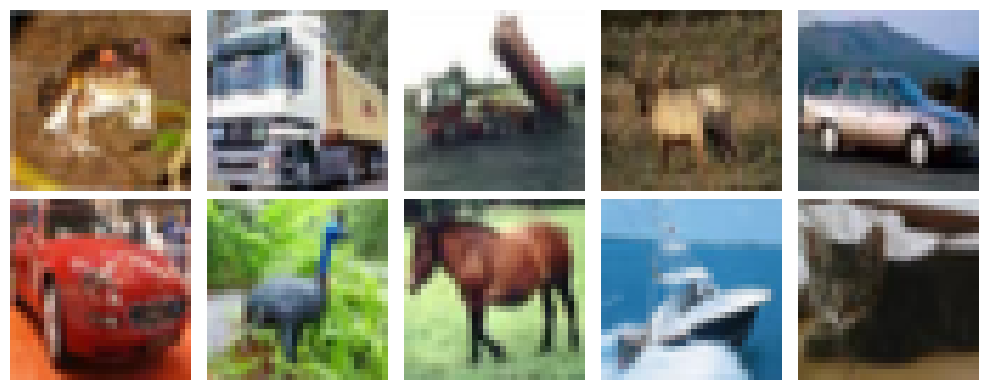

In [ ]:
plt.figure(figsize=(10, 4))  # Set the overall figure size


for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.axis('off')

plt.tight_layout()  # Ensure that the subplots don't overlap
plt.show()

In [ ]:
# Divide el conjunto de entrenamiento oringinal en conjuntos de entrenamiento y validación con el 80% de los datos usados para entrenamiento y el 20% para validación.

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=5, stratify=y_train)

# Veamos cuantas imagenes hay en cada partición
print(f'Datos de entrenamiento: {X_train.shape[0]}\nDatos de prueba: {X_test.shape[0]}\nDatos de validación: {X_val.shape[0]}\nTotal imágenes: {len(X_train)+len(X_test)+len(X_val)} ')


Datos de entrenamiento: 40000
Datos de prueba: 10000
Datos de validación: 10000
Total imágenes: 60000 


In [ ]:
#Codificamos las etiquetas usando one-hot representation.
Y_train = tf.keras.utils.to_categorical(y_train)
Y_val = tf.keras.utils.to_categorical(y_val)
Y_test = tf.keras.utils.to_categorical(y_test)

## **2. Selección y diseño de modelos**
---

Seleccione el/los modelo/s a explorar para aplicar sobre el conjunto de datos. Recuerde, la selección del modelo está influenciada por diferentes factores. Si el problema es de análisis de imagen, muy seguramente hay que explorar diversas redes neuronales convolucionales. Si el problema está relacionado con NLP, muy seguramente hay que explorar modelos basados en Tranformers.

Además, debe definir cuál es su problema:

- **Regresión**: se busca estimar un valor continúo a partir de los datos.
- **Clasificación**: permite estimar un valor categórico a partir de los datos.
- **Agrupamiento**: permite encontrar grupos de datos similares.
- **Otros modelos**: recuerde que dispone de otros tipos de tareas supervisadas y no supervisadas.

En cualquier caso los profundos disponibles en _TensorFlow_ constituyen una base sobre la que usted debe definir un clasificador/regresor/_encoder_/_decoder_ final, compuesto de una o más capas densas, con opción de incluir _dropout_ o capas de normalización.

Justifique la escogencia y diseño de los modelos a explorar:

**Respuesta:**

Nuestro proyecto aborda un problema de clasificación. Para utilizamos un enfoque basado en redes neuronales convolucionales (CNNs) utilizando TensorFlow y Keras. Para ello utilizamos varios enfoques, un modelo customizado (Learning from scratch), así como transfer learning y fine-tuning. Para el modelo customizado, primero se estableció una semilla para garantizar la reproducibilidad de los resultados. Luego, se definió un modelo secuencial (Sequential) que consta de capas convolucionales, max pooling, dropout para regularización, capas densas y una capa de salida con activación softmax. La capa de entrada tiene una forma de (32, 32, 3), que es adecuada para imágenes de 32x32 píxeles con 3 canales de color (RGB). Se utilizan capas convolucionales con diferentes números de filtros y tamaños de kernel, seguidas de max pooling para reducir la dimensionalidad. La función de activación ReLU se usa en las capas convolucionales y densas. Dropout se aplica para mitigar el sobreajuste. La función de pérdida es la entropía cruzada categórica, y el optimizador es Adam con una tasa de aprendizaje de 1e-3. Finalmente, el modelo se compila y se devuelve. Alternativamente, usamos transfer-learning y fine-tunning. Para ello, utilizamos Mobilenet, preparamos las imágenes con el preprocesamiento necesario y definimos el modelo usando una capa de pooling, una capa densa, seguida del dropout para hacer un proceso de regularización y evitar que todas las neuronas aprendan lo mismo, continuando con una capa de salida para definir el modelo. Incluyendo también etapas de calentamiento y entrenamiento. El accuracy para este fue de 0.52 y para el modelo customizado de 0.72. En esta cuarta entrega del proyecto hemos implementado un transfer learning con fine tuning utilizando VGG19 incrementando el valor de precisión (accuracy) hasta 0.82. Cada uno de estos modelos fue probado con varios hiperparámetros mostrando aquellos con los mejores valores por cuestiones de tiempo de cálculo y uso de GPU en Google colab.
Antes de construir y validar los modelos antes mencionados (customizado, transfer learning y fine-tuning), utilizamos una estrategia para la aumentación de datos. En los datos de entrenamiento se realizaron diversas modificaciones, mientras que en los de validación y prueba solo el re-escalado. El primer parámetro utilizado en el conjunto de entrenamiento, 'rescale', normaliza los valores de píxeles de las imágenes dividiendo por 255. Los siguientes parámetros, 'width_shift_range' y 'height_shift_range', controlan el rango de cambio en la anchura y altura de las imágenes respectivamente, permitiendo la generación de nuevas imágenes ligeramente desplazadas. 'zoom_range' especifica el rango de zoom aplicado a las imágenes. 'horizontal_flip' determina si se deben realizar volteos horizontales en las imágenes. Finalmente, 'fill_mode' indica cómo llenar los píxeles nuevos creados después de aplicar transformaciones como desplazamientos y zoom en las imágenes. Cada uno de estos parámetros influye en la diversidad y el aumento de datos durante el entrenamiento de un modelo de aprendizaje profundo.

## **3. Implementación de los modelos**
---

Implemente los modelos descritos anteriormente usando herramientas de _TensorFlow_. Recuerde que puede aplicar técnicas de aumentación de datos, si es necesario.

# 3.1. Data Augmentation

In [ ]:
#Data augmentation
def data_augmentation(X_train, y_train,
                      X_val, y_val,
                      X_test, y_test,
                      width_range, height_range, zoom_range, h_flip, fill, rotation):

    # Fijamos una semilla para efectos de reproducibilidad
    np.random.seed(0)
    tf.keras.utils.set_random_seed(0)

     # Definimos el generador de datos para el conjunto de entrenamiento
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        width_shift_range=width_range,
        height_shift_range=height_range,
        zoom_range=zoom_range,
        horizontal_flip=h_flip,
        fill_mode=fill,
        rotation_range= rotation
    )
    # Definimos el generador de datos para el conjunto de validación
    val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    # Definimos el generador de datos para el conjunto de prueba
    test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


    # Generamos el generador para el conjunto de entrenamiento
    X_train_aug = train_datagen.flow(X_train, y_train, batch_size=32)
    # Generamos el generador para el conjunto de validación
    X_val_aug = val_datagen.flow(X_val, y_val)
    # Generamos el generador para el conjunto de prueba
    X_test_aug = test_datagen.flow(X_test, y_test)

    return X_train_aug, X_val_aug, X_test_aug

La función retorna un objeto tipo <class 'keras.src.preprocessing.image.NumpyArrayIterator'>
Cada batch del generador tiene tamaño  (32, 32, 32, 3)


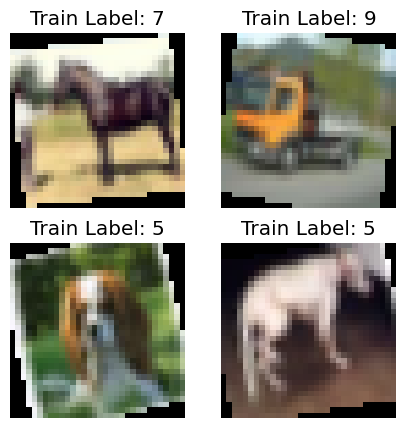

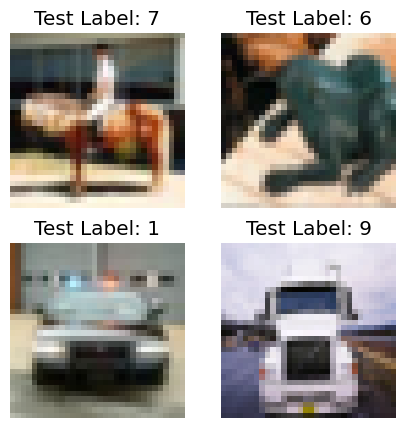

In [ ]:
train_gen, val_gen, test_gen = data_augmentation(X_train=X_train,
                                                y_train=Y_train,
                                                X_val=X_val,
                                                y_val=Y_val,
                                                X_test=X_test,
                                                y_test=Y_test,
                                                width_range=0.0,
                                                height_range=0.0,
                                                zoom_range=0.1,
                                                h_flip=True,
                                                fill = 'constant',
                                                rotation = 15)

print("La función retorna un objeto tipo", type(train_gen))
print("Cada batch del generador tiene tamaño ", next(train_gen)[0].shape)
# Extraemos un batch de train
ims, lab = next(train_gen)
plt.figure(figsize=(5, 5))
# Mostramos 4 ejemplos
for i in range(4):
    plt.subplot(221+i)
    plt.imshow(((ims[i]-ims[i].min())/((ims[i]-ims[i].min())).max()))
    plt.axis("off")
    plt.title(f"Train Label: {np.argmax(lab[i])}")

# Extraemos un batch de test
ims, lab = next(test_gen)
plt.figure(figsize=(5, 5))
# Mostramos 4 ejemplos
for i in range(4):
    plt.subplot(221+i)
    plt.imshow(((ims[i]-ims[i].min())/((ims[i]-ims[i].min())).max()))
    plt.axis("off")
    plt.title(f"Test Label: {np.argmax(lab[i])}")

# 3.2. Definición del modelo

In [ ]:
def custom_model(units, dropout):
    # Fijamos una semilla para efectos de reproducibilidad
    np.random.seed(0)
    tf.random.set_seed(0)

    # Definimos una arquitectura secuencial para la CNN
    model = Sequential()
    # Capa convolucional con 32 filtros y un kernel 3x3, ativación ReLU
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    # Capa de max pooling
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    # Agregamos dropout para regularización
    model.add(tf.keras.layers.Dropout(dropout))
    # Capa convolucional con 64 filtros y un kernel 3x3,activación ReLU
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    # Capa de max pooling
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    # Capa convolucional con 64 filtros y un kernel 3x3,activación ReLU
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    # Aplana la salida para la capa densa
    model.add(tf.keras.layers.Flatten())
    # Agregamos una capa densa
    model.add(tf.keras.layers.Dense(units, activation='relu'))
    # Agregamos dropout para regularización
    model.add(tf.keras.layers.Dropout(dropout))
    # agrega una capa de salida
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    # Compilamos el modelo
    model.compile(loss="categorical_crossentropy",
                  optimizer=tf.optimizers.Adam(learning_rate=1e-3),
                  metrics=["accuracy"])

    return model

In [ ]:
model_test = custom_model(units=32, dropout=0.2)
model_test.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          3

# 3.3. Compilar el modelo

In [ ]:
def compile_model(model, l_r, metrics):
    # Fijamos una semilla para efectos de reproducibiidad
    np.random.seed(0)
    tf.keras.utils.set_random_seed(0)
    # Compilamos el modelo
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=l_r),
                  metrics=metrics)

    return model

In [ ]:
test_model = compile_model(
                          model=model_test,
                          l_r=1e-3,
                          metrics=['accuracy']
                           )
test_model.get_compile_config()

{'optimizer': {'module': 'keras.optimizers',
  'class_name': 'Adam',
  'config': {'name': 'Adam',
   'weight_decay': None,
   'clipnorm': None,
   'global_clipnorm': None,
   'clipvalue': None,
   'use_ema': False,
   'ema_momentum': 0.99,
   'ema_overwrite_frequency': None,
   'jit_compile': False,
   'is_legacy_optimizer': False,
   'learning_rate': 0.0010000000474974513,
   'beta_1': 0.9,
   'beta_2': 0.999,
   'epsilon': 1e-07,
   'amsgrad': False},
  'registered_name': None},
 'loss': 'categorical_crossentropy',
 'metrics': ['accuracy'],
 'loss_weights': None,
 'weighted_metrics': None,
 'run_eagerly': None,
 'steps_per_execution': None,
 'jit_compile': None}

# 3.4. Entrenar el modelo

In [ ]:
def train_model(model, train_gen, val_gen, epochs, weights):
    # Fijamos una semilla para efectos de reproducibilidad
    np.random.seed(0)
    tf.random.set_seed(0)  # Usar tf.random.set_seed en lugar de tf.keras.utils.set_random_seed

    # Calcular el número de imágenes en los conjuntos de entrenamiento y validación
    num_train_images = len(train_gen) -1
    num_val_images = len(val_gen) -1

    # Definir el callback para guardar el mejor modelo
    best_callback = tf.keras.callbacks.ModelCheckpoint(filepath=weights,
                                                       monitor='val_loss',
                                                       verbose=1,
                                                       save_best_only=True,
                                                       save_weights_only=True,
                                                       mode='min')
    # Entrenar el modelo
    history = model.fit(train_gen,
                        steps_per_epoch=num_train_images,
                        validation_data=val_gen,
                        validation_steps=num_val_images,
                        epochs=epochs,
                        callbacks=[best_callback])

    return model, history

In [ ]:
#Creación del modelo
model_test = custom_model(    units=96,
                              dropout=0.1)

#Compilación del modelo
test_model = compile_model(
                          model=model_test,
                          l_r=1e-3,
                          metrics=['accuracy']
                           )

#Entrenamiento del modelo
model_tr, history = train_model(model=test_model,
                                train_gen=train_gen,
                                val_gen=val_gen,
                                epochs=30,
                                weights='transfer_learning.h5')

#Información
print(history.history.keys())
print('El modelo se ha entrenado durante',len(history.history['val_accuracy']),'epochs')
if os.path.isfile('transfer_learning.h5'):
  print("Los pesos se guardaron en 'transfer_learning.h5'")


Epoch 1/30
1249/1249 [==============================] - ETA: 0s - loss: 1.6628 - accuracy: 0.3904
Epoch 1: val_loss improved from inf to 1.38268, saving model to transfer_learning.h5
1249/1249 [==============================] - 44s 23ms/step - loss: 1.6628 - accuracy: 0.3904 - val_loss: 1.3827 - val_accuracy: 0.4964
Epoch 2/30
1249/1249 [==============================] - ETA: 0s - loss: 1.3573 - accuracy: 0.5132
Epoch 2: val_loss improved from 1.38268 to 1.25668, saving model to transfer_learning.h5
1249/1249 [==============================] - 30s 24ms/step - loss: 1.3573 - accuracy: 0.5132 - val_loss: 1.2567 - val_accuracy: 0.5492
Epoch 3/30
1248/1249 [============================>.] - ETA: 0s - loss: 1.2296 - accuracy: 0.5599
Epoch 3: val_loss improved from 1.25668 to 1.21460, saving model to transfer_learning.h5
1249/1249 [==============================] - 29s 23ms/step - loss: 1.2297 - accuracy: 0.5598 - val_loss: 1.2146 - val_accuracy: 0.5730
Epoch 4/30
1249/1249 [================

# 3.5. Evaluar el modelo

In [ ]:
def evaluate_model(model, test_gen):
    # Fijamos una semilla para efectos de reproducibiidad
    np.random.seed(0)
    tf.keras.utils.set_random_seed(0)
    metrics = metrics = model.evaluate(test_gen)
    return metrics

In [ ]:
# Evaluación del modelo
metrics = evaluate_model(test_model, test_gen)


313/313 [==============================] - 2s 6ms/step - loss: 0.7975 - accuracy: 0.7318


In [ ]:
# Resultados de la evaluación
print("Resultados de la evaluación:")
print("Loss:", metrics[0])
print("Accuracy:", metrics[1])
print(f"En este caso el {metrics[1]*100:.2f}% de las muestras fueron clasificadas correctamente por el modelo.")

Resultados de la evaluación:
Loss: 0.797508716583252
Accuracy: 0.7318000197410583
En este caso el 73.18% de las muestras fueron clasificadas correctamente por el modelo.


# OPCIÓN 2: Transfer Learning vs Fine Tuning



#Mobilenet_v2

##Data Augmentation

Aplicamos a las imágenes el preprocesamiento necesario para mobilenet_v2:

In [ ]:
X_train_prep = tf.keras.applications.mobilenet_v2.preprocess_input(X_train)
X_val_prep = tf.keras.applications.mobilenet_v2.preprocess_input(X_val)
X_test_prep = tf.keras.applications.mobilenet_v2.preprocess_input(X_test)

In [ ]:
train_gen_tr, val_gen_tr, test_gen_tr = data_augmentation(X_train=X_train_prep,
                                                y_train=Y_train,
                                                X_val=X_val_prep,
                                                y_val=Y_val,
                                                X_test=X_test_prep,
                                                y_test=Y_test,
                                                width_range=0.0,
                                                height_range=0.0,
                                                zoom_range=0.1,
                                                h_flip=True,
                                                fill = 'constant',
                                                rotation = 10)

print("La función retorna un objeto tipo", type(train_gen_tr))
print("Cada batch del generador tiene tamaño ", next(train_gen_tr)[0].shape)

La función retorna un objeto tipo <class 'keras.src.preprocessing.image.NumpyArrayIterator'>
Cada batch del generador tiene tamaño  (32, 32, 32, 3)


##Definición el modelo

Para la definición del modelo, se escogió MobileNetV2

In [ ]:
def pretrained_model(train_base_model, units, dropout):

  # Fijamos una semilla para efectos de reproducibiidad
  np.random.seed(0)
  tf.keras.utils.set_random_seed(0)
  # definir el modelo Mobilenet
  extractor = tf.keras.applications.mobilenet_v2.MobileNetV2(weights='imagenet',
                                                               include_top=False,
                                                               input_shape=(32, 32, 3))

  # definir si congelamos el extractor de características

  for layer in extractor.layers:
    layer.trainable= train_base_model

  # crear una capa de pooling
  #pool = tf.keras.layers.GlobalAveragePooling2D()(extractor.output)

  #capa flatten
  flatten = tf.keras.layers.Flatten()(extractor.output)

  #crear capas densas
  dense1 = tf.keras.layers.Dense(units=units, activation="relu", input_dim = 512)(flatten)
  dense2 = tf.keras.layers.Dense(units=512, activation="relu")(dense1)
  dense3 = tf.keras.layers.Dense(units=256, activation="relu")(dense2)
  dense4 = tf.keras.layers.Dense(units=128, activation="relu")(dense3)

  # agregar dropout para regularización
  #drop = tf.keras.layers.Dropout(dropout)(dense4)

  # agrega una capa de salida
  output = tf.keras.layers.Dense(units=10, activation="softmax")(dense4)

  # definimos nuestro modelo de transfer learning
  model = tf.keras.models.Model(inputs=[extractor.input], outputs=[output])

  return model

In [ ]:
model_test_tr = pretrained_model(train_base_model=False,
                              units=1024,
                              dropout=0.2)
model_test_tr.summary()

9406464/9406464 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 16, 16, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 16, 16, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (N

##Compilar el modelo

In [ ]:
test_model_tr = compile_model(
                          model=model_test_tr,
                          l_r=1e-3,
                          metrics=['accuracy']
                           )
test_model_tr.get_compile_config()

{'optimizer': {'module': 'keras.optimizers',
  'class_name': 'Adam',
  'config': {'name': 'Adam',
   'weight_decay': None,
   'clipnorm': None,
   'global_clipnorm': None,
   'clipvalue': None,
   'use_ema': False,
   'ema_momentum': 0.99,
   'ema_overwrite_frequency': None,
   'jit_compile': True,
   'is_legacy_optimizer': False,
   'learning_rate': 0.0010000000474974513,
   'beta_1': 0.9,
   'beta_2': 0.999,
   'epsilon': 1e-07,
   'amsgrad': False},
  'registered_name': None},
 'loss': 'categorical_crossentropy',
 'metrics': ['accuracy'],
 'loss_weights': None,
 'weighted_metrics': None,
 'run_eagerly': None,
 'steps_per_execution': None,
 'jit_compile': None}

##Entrenar el Modelo con capas Mobilenet_v2 congelados

In [ ]:
def train_model_tr(model, train_gen, val_gen, epochs, weights):
    # Fijamos una semilla para efectos de reproducibiidad
    np.random.seed(0)
    tf.keras.utils.set_random_seed(0)
    # Complete el código desde aquí:
    # Definimos el callback
    best_callback = tf.keras.callbacks.ModelCheckpoint(filepath= weights,
                                                       monitor="val_loss",
                                                       verbose=True,
                                                       save_best_only=True,
                                                       save_weights_only=True,
                                                       mode="min")


    # Entrenamos el modelo
    history = model.fit(x = train_gen,
                        validation_data= val_gen,
                        epochs = epochs,
                        steps_per_epoch = len(train_gen)-1,
                        validation_steps = len(val_gen)-1,
                        callbacks=[best_callback],
                        verbose = 1)

    return model, history

Iniciar entretamiento

In [ ]:
model_tr, history = train_model_tr(model= test_model_tr,
                                   train_gen= train_gen_tr,
                                   val_gen= val_gen_tr,
                                   epochs= 30,
                                   weights='warming_up_tr_mobilenet_v2.h5'
                                   )

Epoch 1/30
1248/1249 [============================>.] - ETA: 0s - loss: 2.0679 - accuracy: 0.2344
Epoch 1: val_loss improved from inf to 1.97677, saving model to warming_up_tr_mobilenet_v2.h5
1249/1249 [==============================] - 40s 29ms/step - loss: 2.0679 - accuracy: 0.2344 - val_loss: 1.9768 - val_accuracy: 0.2719
Epoch 2/30
1248/1249 [============================>.] - ETA: 0s - loss: 2.0048 - accuracy: 0.2640
Epoch 2: val_loss improved from 1.97677 to 1.97158, saving model to warming_up_tr_mobilenet_v2.h5
1249/1249 [==============================] - 35s 28ms/step - loss: 2.0048 - accuracy: 0.2640 - val_loss: 1.9716 - val_accuracy: 0.2652
Epoch 3/30
1248/1249 [============================>.] - ETA: 0s - loss: 1.9788 - accuracy: 0.2736
Epoch 3: val_loss improved from 1.97158 to 1.92495, saving model to warming_up_tr_mobilenet_v2.h5
1249/1249 [==============================] - 36s 28ms/step - loss: 1.9788 - accuracy: 0.2736 - val_loss: 1.9249 - val_accuracy: 0.3015
Epoch 4/30


Evaluar el modelo:

In [ ]:
def evaluate_model(model, test_gen):
    # Fijamos una semilla para efectos de reproducibiidad
    np.random.seed(0)
    tf.keras.utils.set_random_seed(0)
    metrics = model.evaluate(x = test_gen.x, y = test_gen.y)
    return metrics

In [ ]:
evaluate_model(test_model_tr, test_gen)

313/313 [==============================] - 4s 11ms/step - loss: 2.8166 - accuracy: 0.1508


[2.816598892211914, 0.15080000460147858]

## Warming - Up

In [ ]:
# definir función para Warming-Up

def warm_up(train_gen, val_gen, epochs):
    # Complete desde aquí el código
    # Crea el modelo
    model = pretrained_model(train_base_model= False,
                             units=1024,
                             dropout=0.2
                            )
    # Compila el modelo
    model = compile_model(model= model,
                          l_r= 0.001,
                          metrics= ['accuracy'])
    # Entrena el modelo
    model, history = train_model_tr(model= model,
                             train_gen= train_gen,
                             val_gen= val_gen,
                             epochs= epochs,
                             weights='warming_up_tr_mobilenet_v2.h5'
                             )
    return model, history


In [ ]:
model_ft_tr, history = warm_up(
                              train_gen=train_gen,
                              val_gen=train_gen,
                              epochs=30
                              )

Epoch 1/30
1249/1249 [==============================] - ETA: 0s - loss: 2.0647 - accuracy: 0.2342
Epoch 1: val_loss improved from inf to 2.01704, saving model to warming_up_tr_mobilenet_v2.h5
1249/1249 [==============================] - 78s 60ms/step - loss: 2.0647 - accuracy: 0.2342 - val_loss: 2.0170 - val_accuracy: 0.2574
Epoch 2/30
1247/1249 [============================>.] - ETA: 0s - loss: 2.0047 - accuracy: 0.2631
Epoch 2: val_loss improved from 2.01704 to 1.98541, saving model to warming_up_tr_mobilenet_v2.h5
1249/1249 [==============================] - 57s 45ms/step - loss: 2.0044 - accuracy: 0.2630 - val_loss: 1.9854 - val_accuracy: 0.2743
Epoch 3/30
1248/1249 [============================>.] - ETA: 0s - loss: 1.9850 - accuracy: 0.2690
Epoch 3: val_loss improved from 1.98541 to 1.97734, saving model to warming_up_tr_mobilenet_v2.h5
1249/1249 [==============================] - 74s 59ms/step - loss: 1.9850 - accuracy: 0.2689 - val_loss: 1.9773 - val_accuracy: 0.2770
Epoch 4/30


## Compilar de nuevo

In [ ]:
#definir función para compilar de nuevo

def compile_model_ft(model):

  for layer in model.layers:
    layer.trainable = True

  test_model3 = compile_model(model=model,
                              l_r=1e-5,
                              metrics=['accuracy']
                              )

  return model

In [ ]:
model_ft_compiled = compile_model_ft(model_ft_tr)
model_ft_compiled.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 16, 16, 32)           864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 16, 16, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 16, 16, 32)           0         ['bn_Conv1[0][0]']      

##Entrenar con todas las capas

In [ ]:
def train_model_ft(model, train_gen, val_gen, epochs, weights):
    # Fijamos una semilla para efectos de reproducibiidad
    tf.keras.utils.set_random_seed(0)
    # definimos el callback

    model.load_weights(weights)

    best_callback = tf.keras.callbacks.ModelCheckpoint(filepath="warming_up_tr_mobilenet_v2.h5",
                                                      monitor= "val_loss",
                                                      verbose=True,
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      mode="min")

    stopping = tf.keras.callbacks.EarlyStopping(monitor= 'val_loss',
                                                patience= 10,
                                                verbose=0,
                                                mode= 'min',
                                                restore_best_weights=True)


    history = model.fit(x = train_gen,
                        validation_data= val_gen,
                        epochs = epochs,
                        steps_per_epoch = train_gen.x.shape[0]//32,
                        callbacks=[best_callback])


    return model, history

In [ ]:
#test_model_tr.load_weights("warming_up_tr.h5")

In [ ]:
train_gen_tr, val_gen_tr, test_gen_tr = data_augmentation(X_train=X_train_prep,
                                                y_train=Y_train,
                                                X_val=X_val_prep,
                                                y_val=Y_val,
                                                X_test=X_test_prep,
                                                y_test=Y_test,
                                                width_range=0.0,
                                                height_range=0.0,
                                                zoom_range=0.1,
                                                h_flip=True,
                                                fill = 'constant',
                                                rotation = 10)


In [ ]:
model_ft_trained, history = train_model_ft(model=model_ft_compiled,
                                           train_gen=train_gen_tr,
                                           val_gen=val_gen_tr,
                                           epochs=50,
                                           weights='warming_up_tr_mobilenet_v2.h5')

Epoch 1/50
1249/1250 [============================>.] - ETA: 0s - loss: 6.4096 - accuracy: 0.1272
Epoch 1: val_loss improved from inf to 4.77587, saving model to warming_up_tr_mobilenet_v2.h5
1250/1250 [==============================] - 78s 44ms/step - loss: 6.4078 - accuracy: 0.1271 - val_loss: 4.7759 - val_accuracy: 0.1124
Epoch 2/50
1249/1250 [============================>.] - ETA: 0s - loss: 3.1458 - accuracy: 0.1468
Epoch 2: val_loss improved from 4.77587 to 4.47927, saving model to warming_up_tr_mobilenet_v2.h5
1250/1250 [==============================] - 54s 43ms/step - loss: 3.1459 - accuracy: 0.1468 - val_loss: 4.4793 - val_accuracy: 0.1021
Epoch 3/50
1250/1250 [==============================] - ETA: 0s - loss: 2.5224 - accuracy: 0.1561
Epoch 3: val_loss improved from 4.47927 to 2.88062, saving model to warming_up_tr_mobilenet_v2.h5
1250/1250 [==============================] - 59s 47ms/step - loss: 2.5224 - accuracy: 0.1561 - val_loss: 2.8806 - val_accuracy: 0.1078
Epoch 4/50


## Evaluación

In [ ]:
model_ft_trained.evaluate(test_gen_tr)

313/313 [==============================] - 3s 9ms/step - loss: 1.1780 - accuracy: 0.5933


[1.1779611110687256, 0.5932999849319458]

# VGG19

## Data Agumentation

In [ ]:
X_train_prep = X_train
X_val_prep = X_val
X_test_prep = X_test

In [ ]:
train_gen_tr, val_gen_tr, test_gen_tr = data_augmentation(X_train=X_train_prep,
                                                y_train=Y_train,
                                                X_val=X_val_prep,
                                                y_val=Y_val,
                                                X_test=X_test_prep,
                                                y_test=Y_test,
                                                width_range=0.0,
                                                height_range=0.0,
                                                zoom_range=0.1,
                                                h_flip=True,
                                                fill = 'constant',
                                                rotation = 10)

print("La función retorna un objeto tipo", type(train_gen_tr))
print("Cada batch del generador tiene tamaño ", next(train_gen_tr)[0].shape)

La función retorna un objeto tipo <class 'keras.src.preprocessing.image.NumpyArrayIterator'>
Cada batch del generador tiene tamaño  (32, 32, 32, 3)


## Definición del modelo

In [ ]:
def pretrained_model(train_base_model, units, dropout):

  # Fijamos una semilla para efectos de reproducibiidad
  np.random.seed(0)
  tf.keras.utils.set_random_seed(0)

  # definir el modelo Mobilenet
  extractor = tf.keras.applications.VGG19(weights='imagenet',
                                          include_top=False,
                                          input_shape=(32, 32, 3))

  # definir si congelamos el extractor de características

  for layer in extractor.layers:
    layer.trainable= train_base_model

  # crear una capa de pooling
  #pool = tf.keras.layers.GlobalAveragePooling2D()(extractor.output)

  #capa flatten
  flatten = tf.keras.layers.Flatten()(extractor.output)

  #crear capas densas
  dense1 = tf.keras.layers.Dense(units=units, activation="relu", input_dim = 512)(flatten)
  dense2 = tf.keras.layers.Dense(units=512, activation="relu")(dense1)
  dense3 = tf.keras.layers.Dense(units=256, activation="relu")(dense2)
  dense4 = tf.keras.layers.Dense(units=128, activation="relu")(dense3)

  # agregar dropout para regularización
  #drop = tf.keras.layers.Dropout(dropout)(dense4)

  # agrega una capa de salida
  output = tf.keras.layers.Dense(units=10, activation="softmax")(dense4)

  # definimos nuestro modelo de transfer learning
  model = tf.keras.models.Model(inputs=[extractor.input], outputs=[output])

  return model

In [ ]:
model_test_tr = pretrained_model(train_base_model=False,
                              units=1024,
                              dropout=0.2)
model_test_tr.summary()

80134624/80134624 [==============================] - 12s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                             

##Compilar el modelo

In [ ]:
test_model_tr = compile_model(
                          model=model_test_tr,
                          l_r=1e-3,
                          metrics=['accuracy']
                           )
test_model_tr.get_compile_config()

{'optimizer': {'module': 'keras.optimizers',
  'class_name': 'Adam',
  'config': {'name': 'Adam',
   'weight_decay': None,
   'clipnorm': None,
   'global_clipnorm': None,
   'clipvalue': None,
   'use_ema': False,
   'ema_momentum': 0.99,
   'ema_overwrite_frequency': None,
   'jit_compile': False,
   'is_legacy_optimizer': False,
   'learning_rate': 0.0010000000474974513,
   'beta_1': 0.9,
   'beta_2': 0.999,
   'epsilon': 1e-07,
   'amsgrad': False},
  'registered_name': None},
 'loss': 'categorical_crossentropy',
 'metrics': ['accuracy'],
 'loss_weights': None,
 'weighted_metrics': None,
 'run_eagerly': None,
 'steps_per_execution': None,
 'jit_compile': None}

##Entrenar el Modelo con capas VGG19 congeladas

In [ ]:
def train_model_tr(model, train_gen, val_gen, epochs, weights):
    # Fijamos una semilla para efectos de reproducibiidad
    np.random.seed(0)
    tf.keras.utils.set_random_seed(0)
    # Complete el código desde aquí:
    # Definimos el callback
    best_callback = tf.keras.callbacks.ModelCheckpoint(filepath= weights,
                                                       monitor="val_loss",
                                                       verbose=True,
                                                       save_best_only=True,
                                                       save_weights_only=True,
                                                       mode="min")


    # Entrenamos el modelo
    history = model.fit(x = train_gen,
                        validation_data= val_gen,
                        epochs = epochs,
                        steps_per_epoch = len(train_gen)-1,
                        validation_steps = len(val_gen)-1,
                        callbacks=[best_callback],
                        verbose = 1)

    return model, history

Iniciar entretamiento

In [ ]:
model_tr, history = train_model_tr(model= test_model_tr,
                                   train_gen= train_gen,
                                   val_gen= val_gen,
                                   epochs= 30,
                                   weights='warming_up_tr_VGG19.h5'
                                   )

Evaluar el modelo:

In [ ]:
def evaluate_model(model, test_gen):
    # Fijamos una semilla para efectos de reproducibiidad
    np.random.seed(0)
    tf.keras.utils.set_random_seed(0)
    metrics = model.evaluate(x = test_gen.x, y = test_gen.y)
    return metrics

In [ ]:
evaluate_model(test_model_tr, test_gen)

313/313 [==============================] - 5s 14ms/step - loss: 473.6801 - accuracy: 0.3047


[473.6800537109375, 0.30469998717308044]

## Warming - Up

In [ ]:
# definir función para Warming-Up

def warm_up(train_gen, val_gen, epochs):
    # Complete desde aquí el código
    # Crea el modelo
    model = pretrained_model(train_base_model= False,
                             units=1024,
                             dropout=0.2
                            )
    # Compila el modelo
    model = compile_model(model= model,
                          l_r= 0.001,
                          metrics= ['accuracy'])
    # Entrena el modelo
    model, history = train_model_tr(model= model,
                             train_gen= train_gen,
                             val_gen= val_gen,
                             epochs= epochs,
                             weights='warming_up_tr_VGG19.h5'
                             )
    return model, history


In [ ]:
model_ft_tr, history = warm_up(
                              train_gen=train_gen,
                              val_gen=train_gen,
                              epochs=30
                              )

Epoch 1/30
1247/1249 [============================>.] - ETA: 0s - loss: 1.6181 - accuracy: 0.4138
Epoch 1: val_loss improved from inf to 1.52545, saving model to warming_up_tr_VGG19.h5
1249/1249 [==============================] - 75s 57ms/step - loss: 1.6179 - accuracy: 0.4140 - val_loss: 1.5255 - val_accuracy: 0.4479
Epoch 2/30
1249/1249 [==============================] - ETA: 0s - loss: 1.4566 - accuracy: 0.4822
Epoch 2: val_loss improved from 1.52545 to 1.39025, saving model to warming_up_tr_VGG19.h5
1249/1249 [==============================] - 72s 58ms/step - loss: 1.4566 - accuracy: 0.4822 - val_loss: 1.3902 - val_accuracy: 0.5061
Epoch 3/30
1247/1249 [============================>.] - ETA: 0s - loss: 1.3996 - accuracy: 0.5036
Epoch 3: val_loss improved from 1.39025 to 1.38381, saving model to warming_up_tr_VGG19.h5
1249/1249 [==============================] - 54s 43ms/step - loss: 1.3998 - accuracy: 0.5036 - val_loss: 1.3838 - val_accuracy: 0.5135
Epoch 4/30
1247/1249 [==========

## Compilar de nuevo

In [ ]:
#definir función para compilar de nuevo

def compile_model_ft(model):

  for layer in model.layers:
    layer.trainable = True

  test_model3 = compile_model(model=model,
                              l_r=1e-5,
                              metrics=['accuracy']
                              )

  return model

In [ ]:
model_ft_compiled = compile_model_ft(model_ft_tr)
model_ft_compiled.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

##Entrenar con todas las capas

In [ ]:
def train_model_ft(model, train_gen, val_gen, epochs, weights):
    # Fijamos una semilla para efectos de reproducibiidad
    tf.keras.utils.set_random_seed(0)
    # definimos el callback

    model.load_weights(weights)

    best_callback = tf.keras.callbacks.ModelCheckpoint(filepath="warming_up_tr_VGG19.h5",
                                                      monitor= "val_loss",
                                                      verbose=True,
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      mode="min")

    stopping = tf.keras.callbacks.EarlyStopping(monitor= 'val_loss',
                                                patience= 10,
                                                verbose=0,
                                                mode= 'min',
                                                restore_best_weights=True)


    history = model.fit(x = train_gen,
                        validation_data= val_gen,
                        epochs = epochs,
                        steps_per_epoch = train_gen.x.shape[0]//32,
                        callbacks=[best_callback])


    return model, history

In [ ]:
#test_model_tr.load_weights("warming_up_tr.h5")

In [ ]:
train_gen_tr, val_gen_tr, test_gen_tr = data_augmentation(X_train=X_train_prep,
                                                y_train=Y_train,
                                                X_val=X_val_prep,
                                                y_val=Y_val,
                                                X_test=X_test_prep,
                                                y_test=Y_test,
                                                width_range=0.0,
                                                height_range=0.0,
                                                zoom_range=0.1,
                                                h_flip=True,
                                                fill = 'constant',
                                                rotation = 10)


In [ ]:
model_ft_trained, history = train_model_ft(model=model_ft_compiled,
                                           train_gen=train_gen_tr,
                                           val_gen=val_gen_tr,
                                           epochs=50,
                                           weights='warming_up_tr_VGG19.h5')

Epoch 1/50
1249/1250 [============================>.] - ETA: 0s - loss: 0.4199 - accuracy: 0.8494
Epoch 1: val_loss improved from inf to 0.70334, saving model to warming_up_tr_VGG19.h5
1250/1250 [==============================] - 58s 45ms/step - loss: 0.4198 - accuracy: 0.8494 - val_loss: 0.7033 - val_accuracy: 0.7789
Epoch 2/50
1250/1250 [==============================] - ETA: 0s - loss: 0.3948 - accuracy: 0.8592
Epoch 2: val_loss improved from 0.70334 to 0.67037, saving model to warming_up_tr_VGG19.h5
1250/1250 [==============================] - 53s 43ms/step - loss: 0.3948 - accuracy: 0.8592 - val_loss: 0.6704 - val_accuracy: 0.7918
Epoch 3/50
1250/1250 [==============================] - ETA: 0s - loss: 0.3609 - accuracy: 0.8719
Epoch 3: val_loss did not improve from 0.67037
1250/1250 [==============================] - 52s 42ms/step - loss: 0.3609 - accuracy: 0.8719 - val_loss: 0.6992 - val_accuracy: 0.7904
Epoch 4/50
1250/1250 [==============================] - ETA: 0s - loss: 0.33

## Evaluación

In [ ]:
model_ft_trained.evaluate(test_gen_tr)

313/313 [==============================] - 3s 11ms/step - loss: 1.0220 - accuracy: 0.8122


[1.022038221359253, 0.8122000098228455]

In [ ]:
from google.colab import files
files.download('warming_up_tr_VGG19.h5')

# Predicción

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/Proyecto Deep Learning/Datos/"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
test_model_tr.load_weights(path+'warming_up_tr_VGG19.h5')

In [ ]:
mapeo_etiquetas = {
    0: "Aeroplano",
    1: "Automóvil",
    2: "Pájaro",
    3: "Gato",
    4: "Ciervo",
    5: "Perro",
    6: "Rana",
    7: "Caballo",
    8: "Barco",
    9: "Camión"}

In [ ]:
from PIL import Image
image_list = []
First= 0
Final= 20
for i in range(First,Final):
  image = Image.open(path+"Images/"+str(i)+'.jpg')  # Replace 'your_image_path.png' with your image file path
  image = image.resize((32, 32))

  # Convert the image to a NumPy array
  image_array = np.array(image)
  # If the image is grayscale (1 channel), expand it to 3 channels (R, G, B)
  if image_array.shape[-1] == 1:
      image_array = np.repeat(image_array, 3, axis=-1)
  image_list.append(image_array)

image_array = np.array(image_list)



NameError: ignored

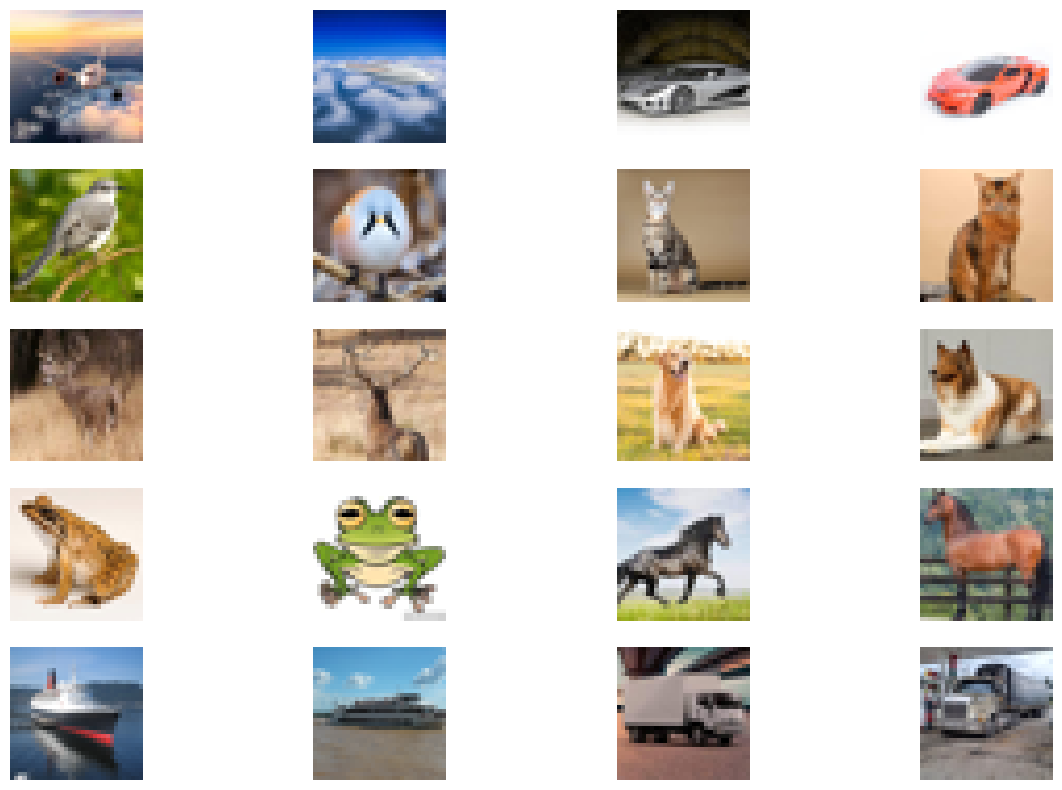

In [ ]:
plt.figure(figsize=(15, 10))  # Set the overall figure size


for i in range(Final-First):
    plt.subplot(5, 4, i + 1)
    plt.imshow(image_array[i])
    plt.axis('off')

In [ ]:
list_pred=list(np.argmax(test_model_tr.predict(image_array), axis=1, out=None))

1/1 [==============================] - 0s 308ms/step


In [ ]:
#np.argmax(model_ft_trained(tf.reshape(X_train[4], (1, 32, 32, 3))), axis=None, out=None)
list_pred=list(np.argmax(test_model_tr(image_array), axis=1, out=None))


In [ ]:
etiquetas_lista = [mapeo_etiquetas.get(numero, "Etiqueta no encontrada") for numero in list_pred]
print(etiquetas_lista)

['Automóvil', 'Aeroplano', 'Automóvil', 'Automóvil', 'Pájaro', 'Automóvil', 'Perro', 'Perro', 'Caballo', 'Ciervo', 'Caballo', 'Perro', 'Rana', 'Rana', 'Caballo', 'Caballo', 'Barco', 'Barco', 'Automóvil', 'Automóvil']


En resumen, podemos concluir que el modelo más destacado VGG19 logró una separación efectiva entre los medios de transporte y los animales en la mayoría de los casos. En algunas imágenes, incluso se pudo identificar con precisión el tipo específico de animal o medio de transporte, aunque se produjeron errores ocasionales. Dada la baja resolución de las imágenes, consideramos que este resultado es satisfactorio. Algunos ejemplos de imágenes que el modelo identificó correctamente incluyen automóviles, ranas, caballos y barcos. Los errores se produjeron principalmente cuando elementos con puntos o círculos, que se asemejaban a ruedas, estaban presentes en la imagen y se clasificaron erróneamente como automóviles, y los distintos animales cuadrupedos a veces se confundían entre ellos.